<a href="https://colab.research.google.com/github/nephelim74/NNET/blob/main/dz_nn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_digits
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


In [347]:
# Загрузка данных
def inicialize():
  digits = load_digits()
  X = digits.data  # Изображения цифр (8x8 пикселей)
  y = digits.target  # Метки (цифры от 0 до 9)
  # Нормализация данных (приводим значения к диапазону [0, 1])
  X = X / 16.0  # Максимальное значение пикселя в данных — 16

  # Преобразуем метки в one-hot encoding
  def to_one_hot(y):
      n_classes = np.max(y) + 1
      one_hot = np.zeros((len(y), n_classes))
      for i in range(len(y)):
          one_hot[i, y[i]] = 1
      return one_hot

  y_one_hot = to_one_hot(y)
  X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test



In [376]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = inicialize()

In [377]:
learning_rate = 0.1
num_epochs = 100

In [378]:
# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [379]:

def test_f(num_epochs):
  errors = []
  metrics = []
  neuron_numb = 20
  np.random.seed(1)
  w0 = np.random.random((64, neuron_numb))
  w1 = np.random.random((neuron_numb, 10))
  # X_train, X_test, y_train, y_test = inicialize()
  for i in range(num_epochs):
      # Прямое распространение (feed forward)
      layer0 = X_train
      layer1 = sigmoid(np.dot(layer0, w0))
      layer2 = sigmoid(np.dot(layer1, w1))

      # Обратное распространение (back propagation)
      layer2_error = layer2 - y_train
      layer2_grad = layer2_error * sigmoid_deriv(layer2)

      layer1_error = layer2_grad.dot(w1.T)
      layer1_grad = layer1_error * sigmoid_deriv(layer1)

      # Обновление весов
      w1 -= layer1.T.dot(layer2_grad) * learning_rate
      w0 -= layer0.T.dot(layer1_grad) * learning_rate

      # Расчет ошибки и метрик
      error = np.mean(np.abs(layer2_error))
      errors.append(error)

      preds = np.argmax(layer2, axis=1)
      labels = np.argmax(y_train, axis=1)
      accuracy = (preds == labels).sum() * 100 / len(labels)
      metrics.append(accuracy)
  return errors, metrics, accuracy, preds, layer2, w0, w1

In [384]:
errors, metrics, accuracy, preds, layer2, w0, w1= test_f(num_epochs)

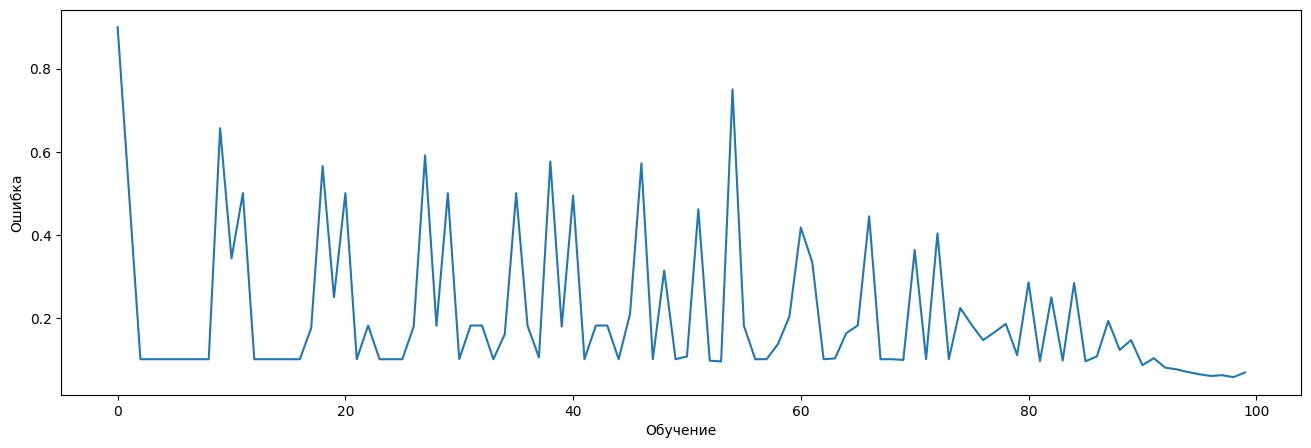

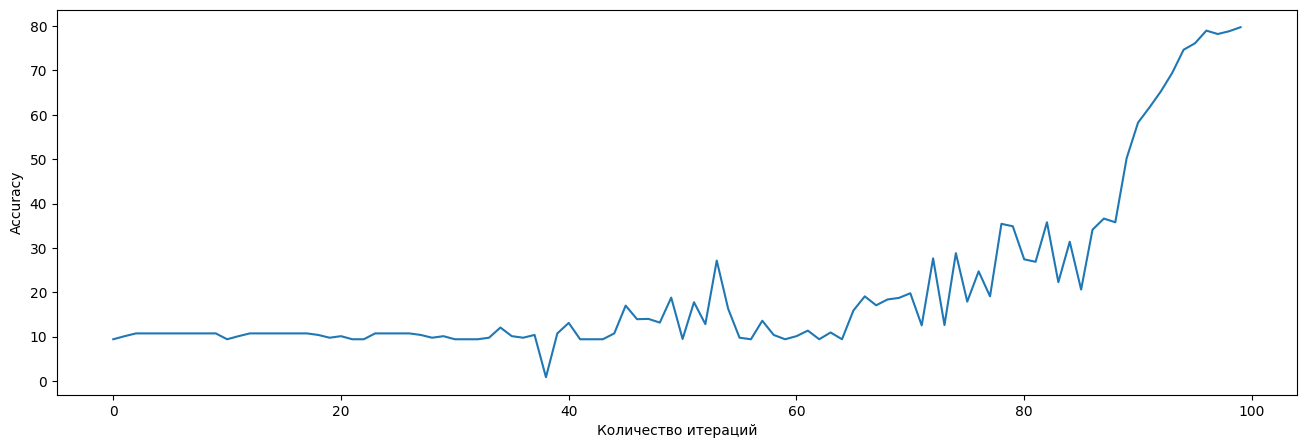

In [385]:
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

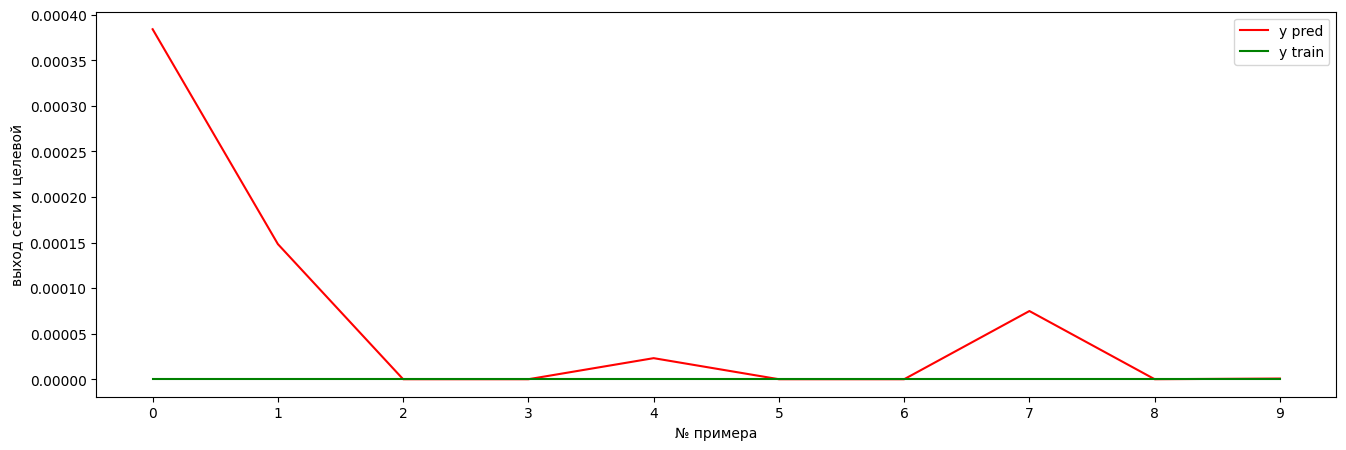

In [386]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

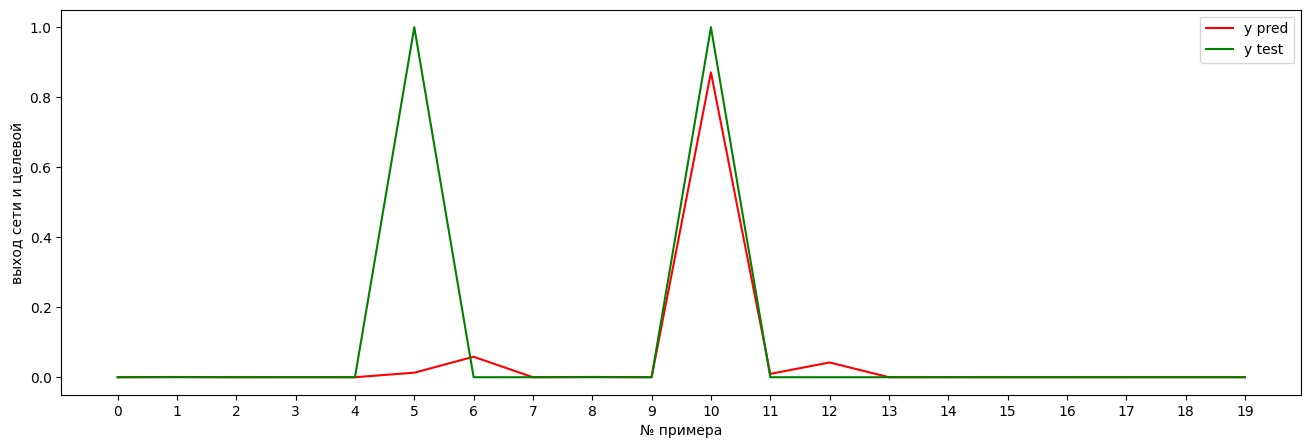

accuracy на тесте 73.33%


In [387]:
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))

N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

За счет изменения скорости обучения (например замедления на 10%) и увеличения количества эпох до 150, можно повысить точность модели на 10 - 15 %

In [448]:
learning_rate = 0.01
num_epochs = 150

In [449]:
errors, metrics, accuracy, preds, layer2, w0, w1= test_f(num_epochs)

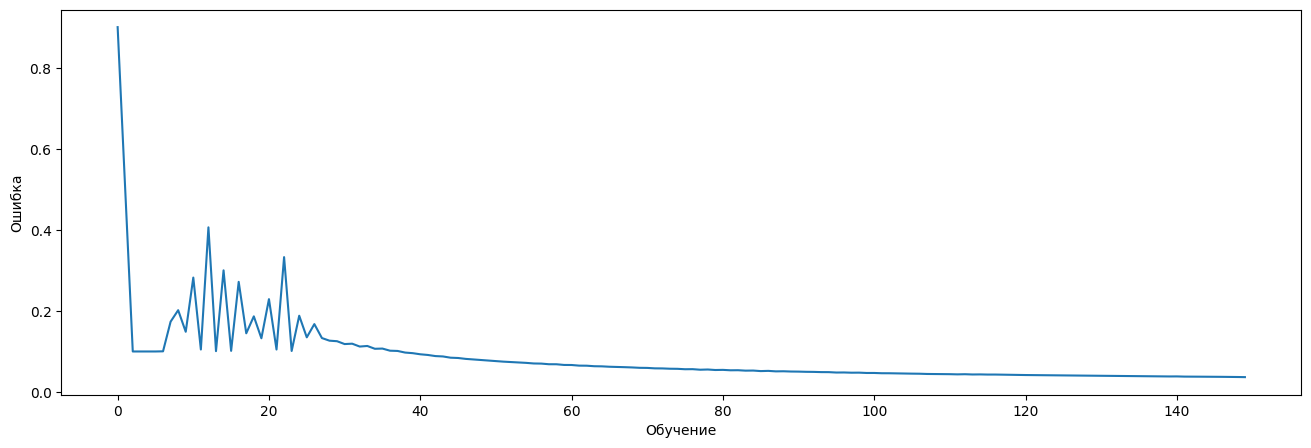

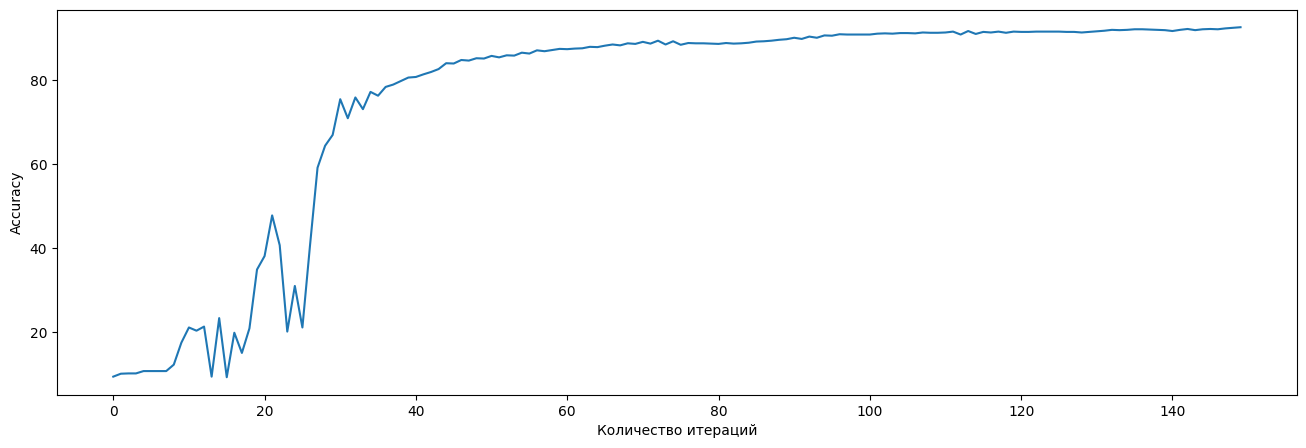

In [450]:
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

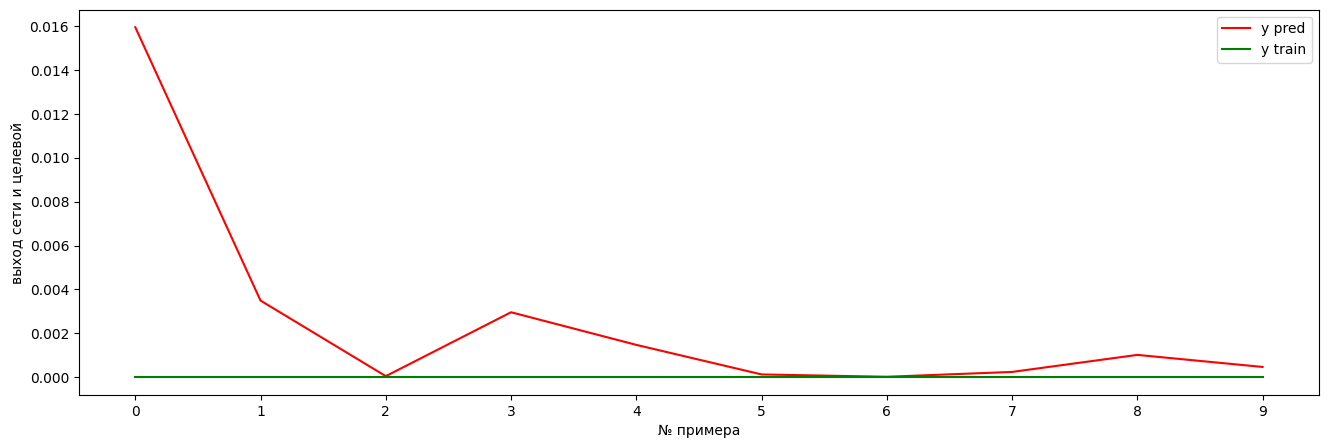

In [451]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

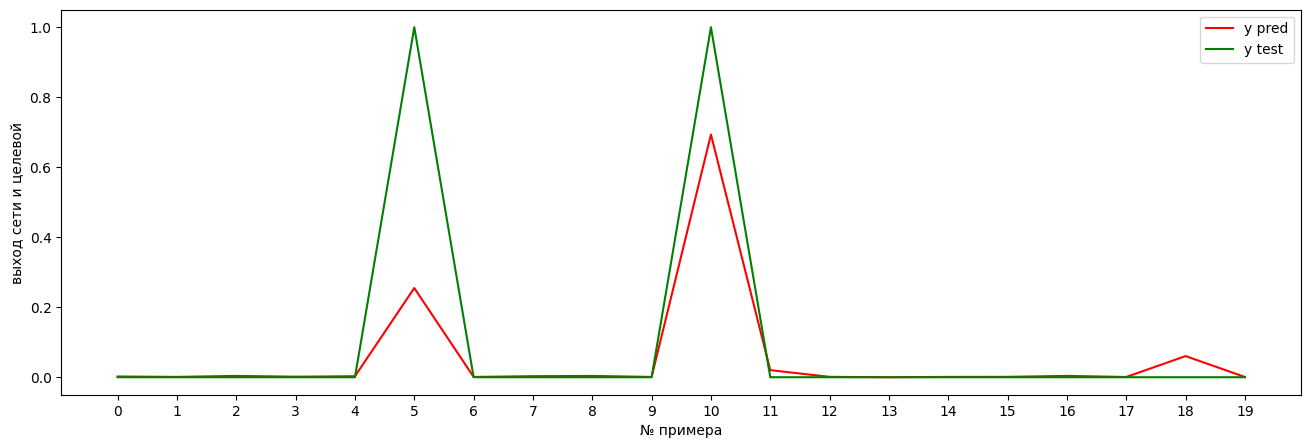

accuracy на тесте 91.39%


In [453]:
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

### Для повышения эффективности нейронной сети, так же можно сделать следующее:

Использование ReLU вместо сигмоиды:

ReLU (Rectified Linear Unit) работает быстрее и часто дает лучшие результаты для скрытых слоев.

Сигмоиду оставим только для выходного слоя, так как она подходит для задач классификации.

Добавление L2-регуляризации:

Это поможет предотвратить переобучение.

Использование Adam вместо градиентного спуска:

Adam — это адаптивный метод оптимизации, который работает быстрее и эффективнее.

Инициализация весов с использованием Xavier/Glorot:

Это улучшит сходимость модели.

Увеличение количества нейронов в скрытом слое:

Увеличение числа нейронов может улучшить способность сети к обучению.

Добавление ранней остановки (early stopping):

Это предотвратит переобучение.

ReLU вместо сигмоиды:

ReLU используется для скрытого слоя, что ускоряет обучение.

Сигмоида оставлена для выходного слоя, так как она подходит для классификации.

Adam вместо градиентного спуска:

Adam адаптивно настраивает скорость обучения, что улучшает сходимость.

L2-регуляризация:

Добавлен штраф за большие значения весов, что предотвращает переобучение.

Инициализация Xavier/Glorot:

Веса инициализируются более эффективно, что улучшает обучение.

Увеличение количества нейронов:

Количество нейронов в скрытом слое увеличено до 64.

Ранняя остановка:

Можно добавить раннюю остановку, если ошибка на валидационной выборке перестает уменьшаться.

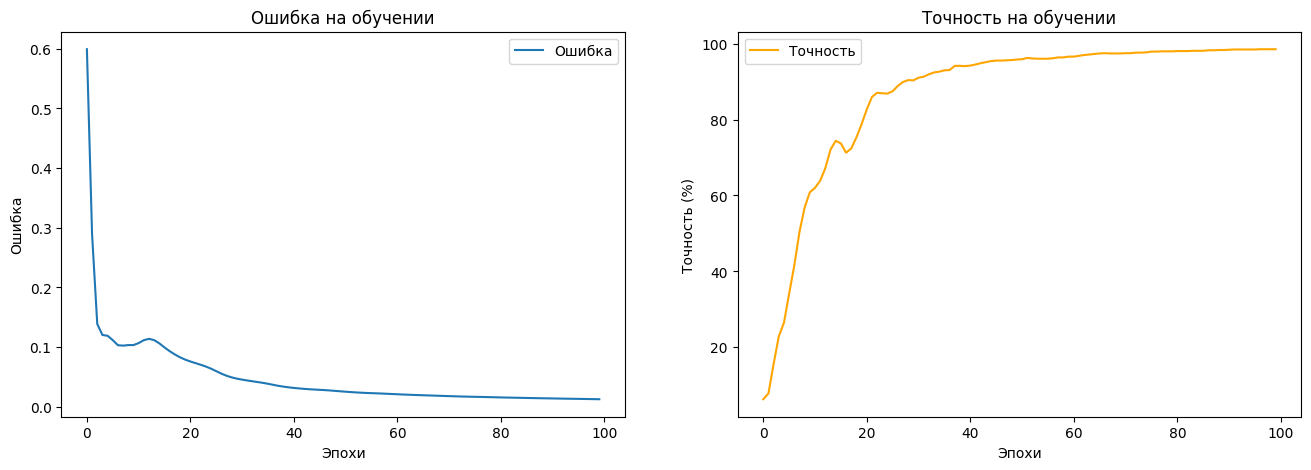

Точность на тесте: 96.39%


In [455]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
digits = load_digits()
X = digits.data
y = digits.target

# One-hot encoding для y
y_one_hot = np.eye(10)[y]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# ReLU и ее производная
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

# Сигмоида и ее производная (для выходного слоя)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Инициализация весов с использованием Xavier/Glorot
def xavier_init(size):
    in_dim = size[0]
    return np.random.randn(*size) * np.sqrt(1 / in_dim)

# Параметры сети
neuron_numb = 64  # Увеличим количество нейронов
w0 = xavier_init((64, neuron_numb))  # Веса входного слоя
w1 = xavier_init((neuron_numb, 10))  # Веса скрытого слоя

# Параметры Adam
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
m_w0 = np.zeros_like(w0)
v_w0 = np.zeros_like(w0)
m_w1 = np.zeros_like(w1)
v_w1 = np.zeros_like(w1)

# Параметр L2-регуляризации
l2_lambda = 0.01

# Обучение сети
def train(num_epochs, learning_rate, w0, w1, m_w0, m_w1, v_w0, v_w1):
    errors = []
    metrics = []

    for i in range(num_epochs):
        # Прямое распространение
        layer0 = X_train
        layer1 = relu(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # Обратное распространение
        layer2_error = layer2 - y_train
        layer2_grad = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_grad.dot(w1.T)
        layer1_grad = layer1_error * relu_deriv(layer1)

        # Градиенты с L2-регуляризацией
        grad_w1 = layer1.T.dot(layer2_grad) + l2_lambda * w1
        grad_w0 = layer0.T.dot(layer1_grad) + l2_lambda * w0

        # Обновление параметров Adam
        m_w1 = beta1 * m_w1 + (1 - beta1) * grad_w1
        v_w1 = beta2 * v_w1 + (1 - beta2) * (grad_w1 ** 2)
        m_w0 = beta1 * m_w0 + (1 - beta1) * grad_w0
        v_w0 = beta2 * v_w0 + (1 - beta2) * (grad_w0 ** 2)

        # Коррекция смещения
        m_w1_corr = m_w1 / (1 - beta1 ** (i + 1))
        v_w1_corr = v_w1 / (1 - beta2 ** (i + 1))
        m_w0_corr = m_w0 / (1 - beta1 ** (i + 1))
        v_w0_corr = v_w0 / (1 - beta2 ** (i + 1))

        # Обновление весов
        w1 -= learning_rate * m_w1_corr / (np.sqrt(v_w1_corr) + epsilon)
        w0 -= learning_rate * m_w0_corr / (np.sqrt(v_w0_corr) + epsilon)

        # Ошибка и точность
        error = np.mean(np.abs(layer2_error))
        errors.append(error)

        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)

    return errors, metrics, w0, w1, m_w0, m_w1, v_w0, v_w1

# Обучение модели
learning_rate = 0.01
num_epochs = 100
errors, metrics, w0, w1, m_w0, m_w1, v_w0, v_w1 = train(
    num_epochs, learning_rate, w0, w1, m_w0, m_w1, v_w0, v_w1
)

# Визуализация ошибки и точности
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(errors, label='Ошибка')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('Ошибка на обучении')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(metrics, label='Точность', color='orange')
plt.xlabel('Эпохи')
plt.ylabel('Точность (%)')
plt.title('Точность на обучении')
plt.legend()
plt.show()

# Оценка на тестовой выборке
layer0_test = X_test
layer1_test = relu(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))

preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"Точность на тесте: {accuracy_test:.2f}%")

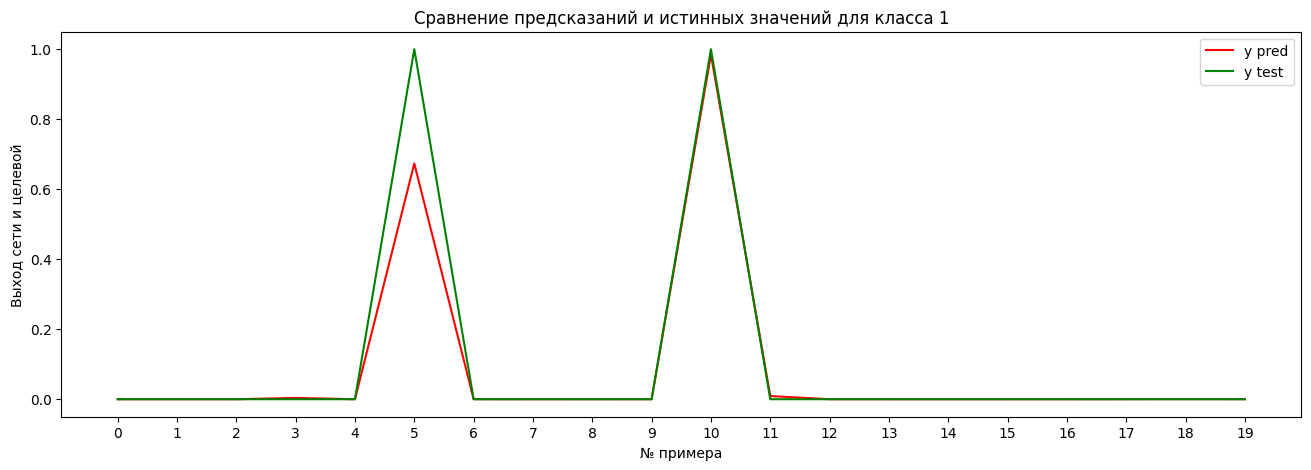

In [456]:
# Оценка на тестовой выборке
layer0_test = X_test
layer1_test = relu(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))

# Выбор класса для визуализации (в данном случае класс с индексом 1)
class_index = 1

# Построение графика
N = 20  # Количество примеров для отображения
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, class_index], 'r', label='y pred')  # Предсказания сети
plt.plot(y_test[:N, class_index], 'g', label='y test')       # Истинные значения
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('Выход сети и целевой')
plt.title(f'Сравнение предсказаний и истинных значений для класса {class_index}')
plt.legend()
plt.show()

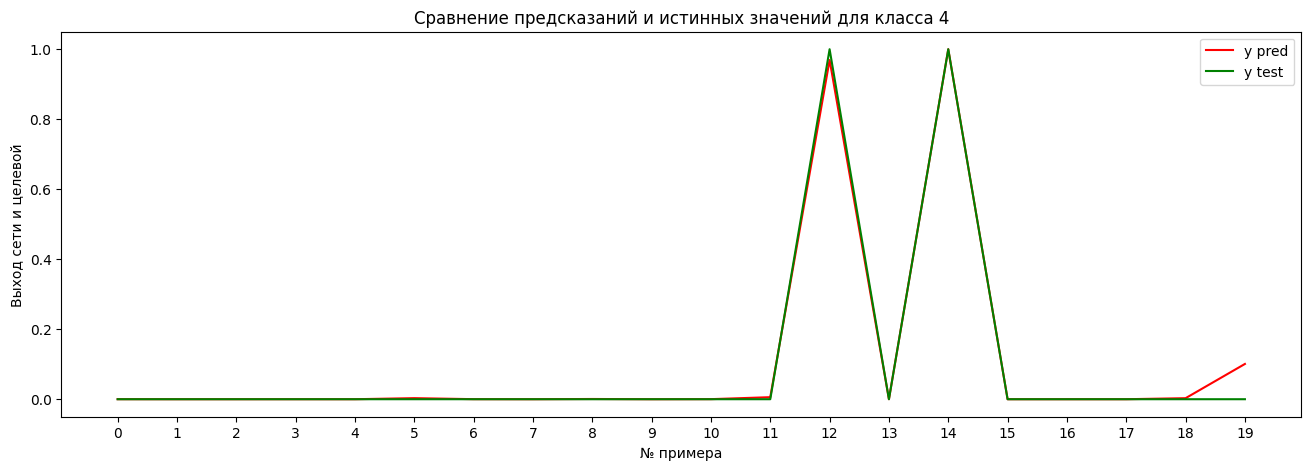

In [467]:
# Выбор класса для визуализации (в данном случае класс с индексом 4)
class_index = 4

# Построение графика
N = 20  # Количество примеров для отображения
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, class_index], 'r', label='y pred')  # Предсказания сети
plt.plot(y_test[:N, class_index], 'g', label='y test')       # Истинные значения
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('Выход сети и целевой')
plt.title(f'Сравнение предсказаний и истинных значений для класса {class_index}')
plt.legend()
plt.show()

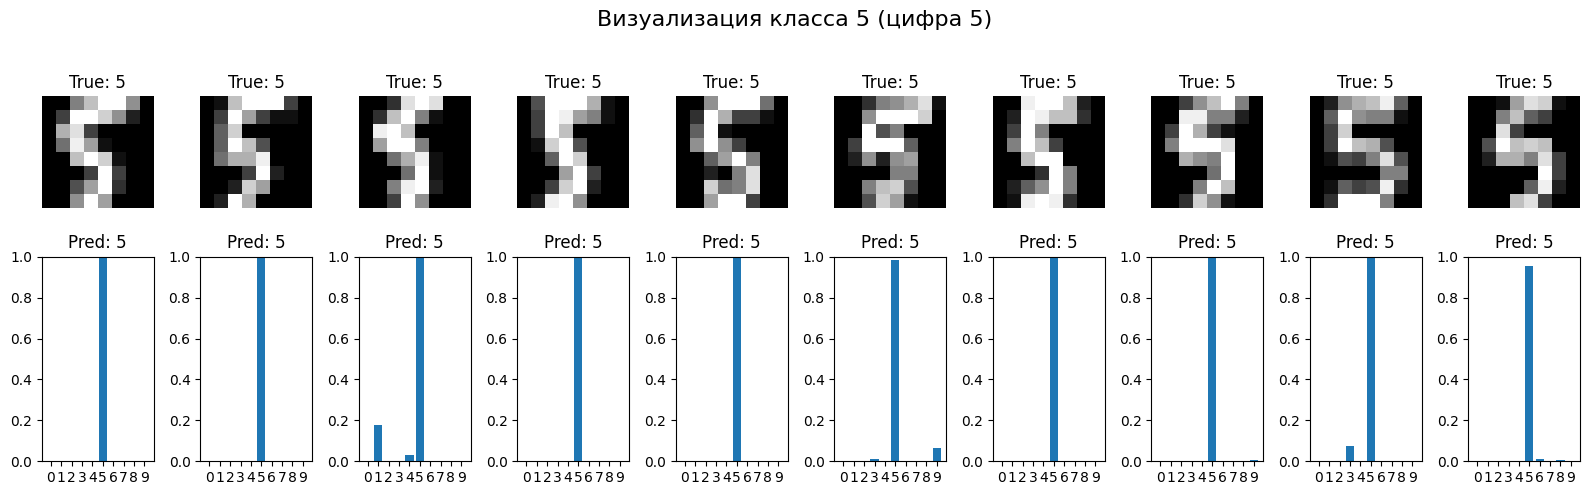

In [465]:
# Выбираем класс для анализа (например, цифра 5)
class_index = 5

# Находим индексы примеров, которые принадлежат выбранному классу
class_indices = np.where(np.argmax(y_test, axis=1) == class_index)[0]

# Ограничиваем количество примеров для визуализации до 10
num_examples = min(10, len(class_indices))  # Чтобы не выводить слишком много
class_indices = class_indices[:num_examples]

# Визуализация изображений и предсказаний
plt.figure(figsize=(16, 5))
for i, idx in enumerate(class_indices):
    # Отображаем изображение
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[idx])}")
    plt.axis('off')

    # Отображаем предсказание модели
    plt.subplot(2, num_examples, num_examples + i + 1)
    plt.bar(range(10), layer2_test[idx])
    plt.xticks(range(10))
    plt.title(f"Pred: {np.argmax(layer2_test[idx])}")
    plt.ylim(0, 1)

plt.suptitle(f"Визуализация класса {class_index} (цифра {class_index})", fontsize=16)
plt.tight_layout()
plt.show()